### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ  
### Факультет искусственного интеллекта  
### Дисциплина: Инструменты обработки и визуализации данных  
## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 6
#### Студент:  Князев Арсений
#### Группа:   ЗФИбд-01-24  
#### Вариант: 30
#### Banknote Authentication Data Set 

1. Считайте из заданного набора данных репозитария UCI значения трех признаков и метки класса.
2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то выведите процент записей набора данных с пропущенными значениями и замените пропущенные значения на значения, указанные в индивидуальном задании. При отсутствии пропущенных значений удалите не менее 5% точек набор данных как выбросы при помощи стандартизованной оценки и выведите процент удаленных точек.
3. Постройте диаграмму рассеяния (scatterplot) на плоскости с координатами, соответствующими двум признакам с наибольшей корреляцией, отображая точки различных классов разными цветами и маркерами переменных размеров в зависимости значений третьего признака. Подпишите оси и рисунок, создайте легенду для классов и маркеров.
4. Постройте линейные графики (lineplot) зависимости признака с наибольшей дисперсией от признака с наименьшей дисперсией для разных классов, выделяя линии для разных классов согласно индивидуальному заданию. Подпишите оси и рисунок, создайте легенду для классов.
5. Постройте диаграмму категориального рассеяния (stripplot или swarmplot) зависимости признака с наименьшей дисперсией от классов типа, указанного в индивидуальном задании. Подпишите оси и рисунок, создайте легенду для классов.
6. Постройте диаграмму размаха (boxplot, boxenplot или violinplot) зависимости признака с наибольшей дисперсией от классов типа, указанного в индивидуальном задании. Подпишите оси и рисунок, создайте легенду для классов. Перечислите признаки, в которых выявлены выбросы.
7. Постройте столбчатую диаграмму типа pointplot, показывающую зависимость признака с наименьшей разностью между третьим и первым квартилями от класса. Подпишите оси и рисунок, создайте легенду для классов.
8. Постройте диаграмму одномерной оценки плотности (kdeplot) для второго признака. Подпишите оси и рисунок.
9. Постройте диаграмму двумерной оценки плотности (jointplot) для первого и третьего признаков. Подпишите оси и рисунок.
10. Постройте график регрессии (regplot или lmplot) зависимости второго признака от первого признака, используя полиномиальную модель второго порядка. Подпишите оси и рисунок.

In [1]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore

### 1
___

In [2]:
banknote_authentication = fetch_ucirepo(id=267)

X = banknote_authentication.data.features
y = banknote_authentication.data.targets

In [3]:
data = pd.concat([X[["skewness"]], X[["curtosis"]], X[["variance"]], y], axis=1)
data.sample(5)

,skewness,curtosis,variance,class
358,10.81610,-3.30000,2.69170,0
1176,2.48110,-2.86730,-0.59587,1
889,0.25244,0.76230,-1.30660,1
1085,-12.81300,12.66890,-2.66490,1
837,6.66510,0.52581,-6.28150,1


### 2
___

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   skewness  1372 non-null   float64
 1   curtosis  1372 non-null   float64
 2   variance  1372 non-null   float64
 3   class     1372 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 43.0 KB


In [5]:
data.isna().sum()

skewness    0
curtosis    0
variance    0
class       0
dtype: int64

In [6]:
features = data.drop(columns=["class"])

z_scores = np.abs(stats.zscore(features))

threshold = 2

outliers_mask = (z_scores > threshold).any(axis=1)

num_outliers = outliers_mask.sum()
total = len(data)
percent_removed = num_outliers / total * 100

df_clean = data[~outliers_mask]

print(f"Удалено точек: {num_outliers}")
print(f"Процент удалённых точек: {percent_removed:.2f}%")
print(f"Оставшийся размер датасета: {len(df_clean)}")

Удалено точек: 107
Процент удалённых точек: 7.80%
Оставшийся размер датасета: 1265


### 3
___

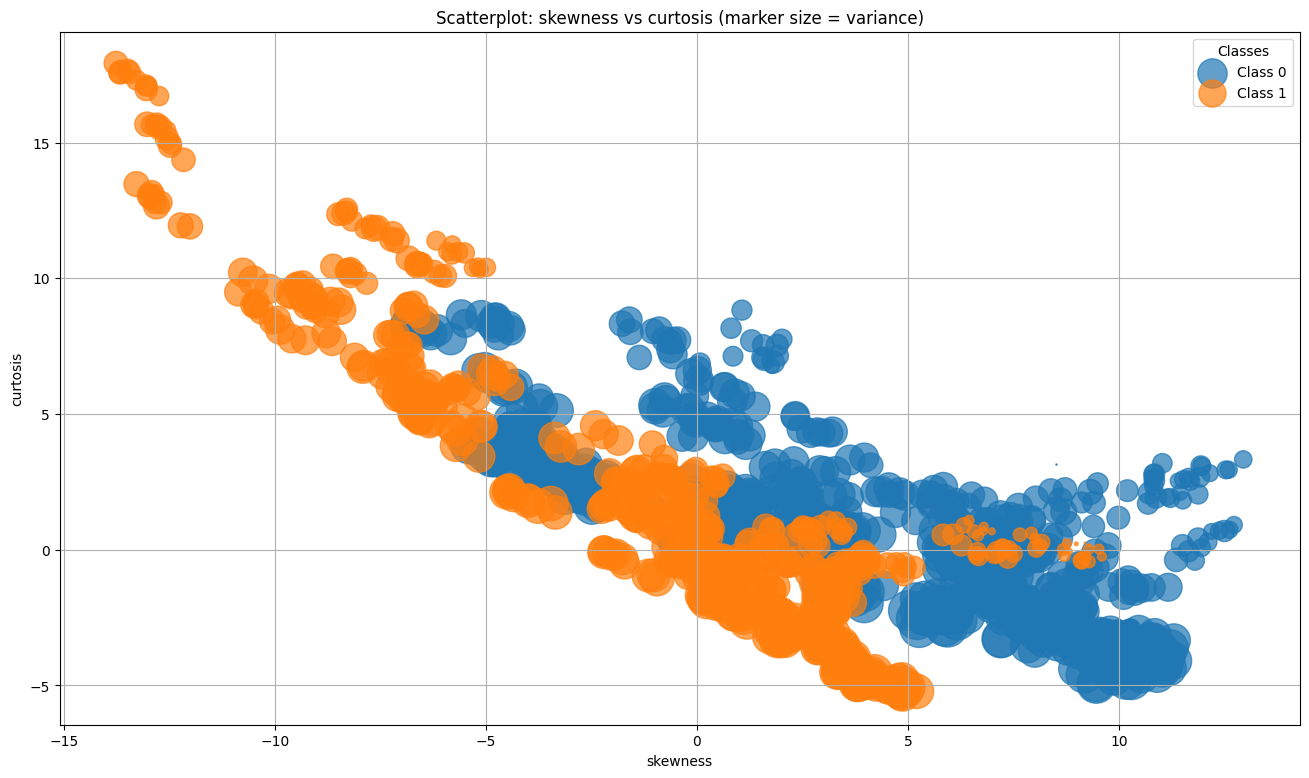

In [7]:
features = data[["skewness", "curtosis", "variance"]]

corr = features.corr().abs()

pairs = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
x_feat, y_feat = pairs.stack().idxmax()

third_feat = list(set(features.columns) - {x_feat, y_feat})[0]

plt.figure(figsize=(16, 9))

classes = data["class"].unique()

for cls in classes:
    subset = data[data["class"] == cls]

    sizes = (subset[third_feat] - subset[third_feat].min() + 0.01) * 80

    plt.scatter(
        subset[x_feat], subset[y_feat], s=sizes, alpha=0.7, label=f"Class {cls}"
    )

plt.xlabel(x_feat)
plt.ylabel(y_feat)
plt.title(f"Scatterplot: {x_feat} vs {y_feat} (marker size = {third_feat})")
plt.legend(title="Classes")
plt.grid(True)

plt.show()

### 4
___

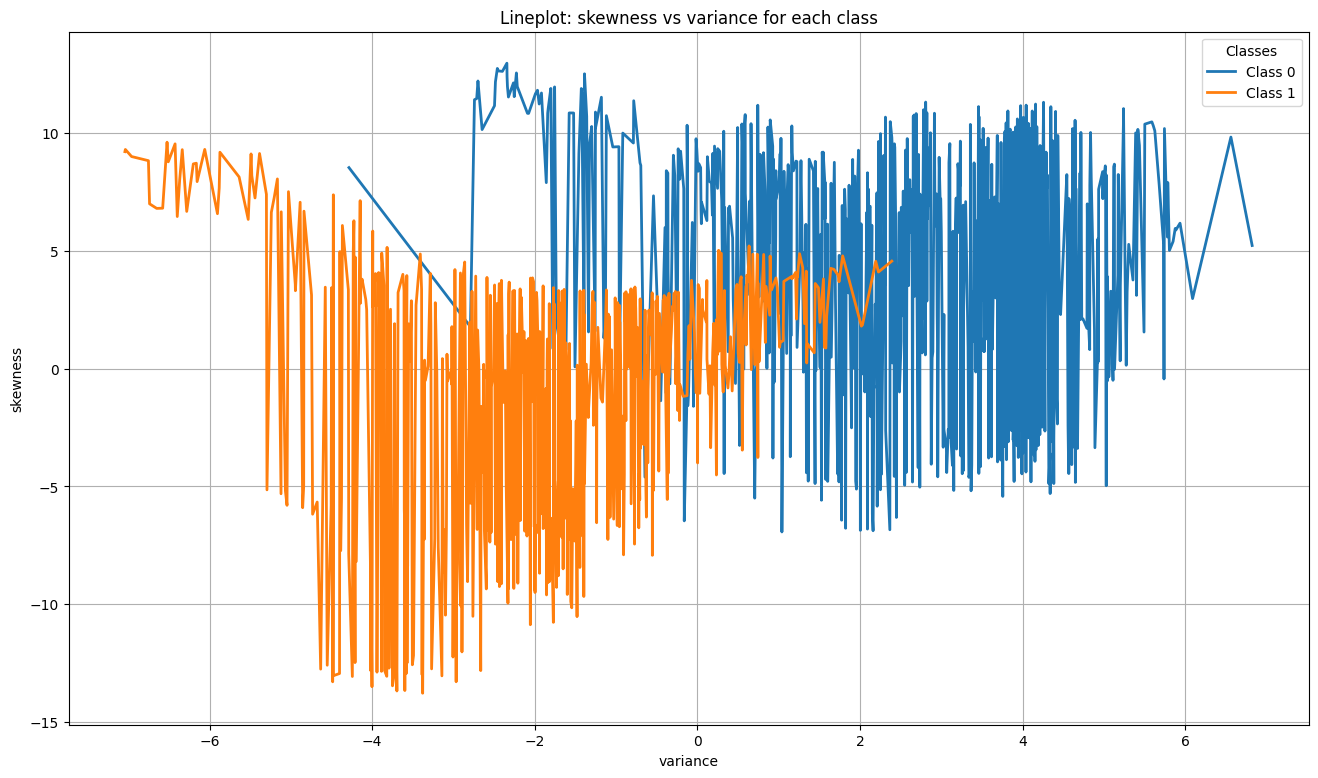

In [8]:
variances = data[["skewness", "curtosis", "variance"]].var()

feat_max_var = variances.idxmax()
feat_min_var = variances.idxmin()

plt.figure(figsize=(16, 9))

for cls in data["class"].unique():
    subset = data[data["class"] == cls].sort_values(by=feat_min_var)

    plt.plot(
        subset[feat_min_var], subset[feat_max_var], label=f"Class {cls}", linewidth=2
    )

plt.xlabel(feat_min_var)
plt.ylabel(feat_max_var)
plt.title(f"Lineplot: {feat_max_var} vs {feat_min_var} for each class")
plt.legend(title="Classes")
plt.grid(True)

plt.show()

### 5
___

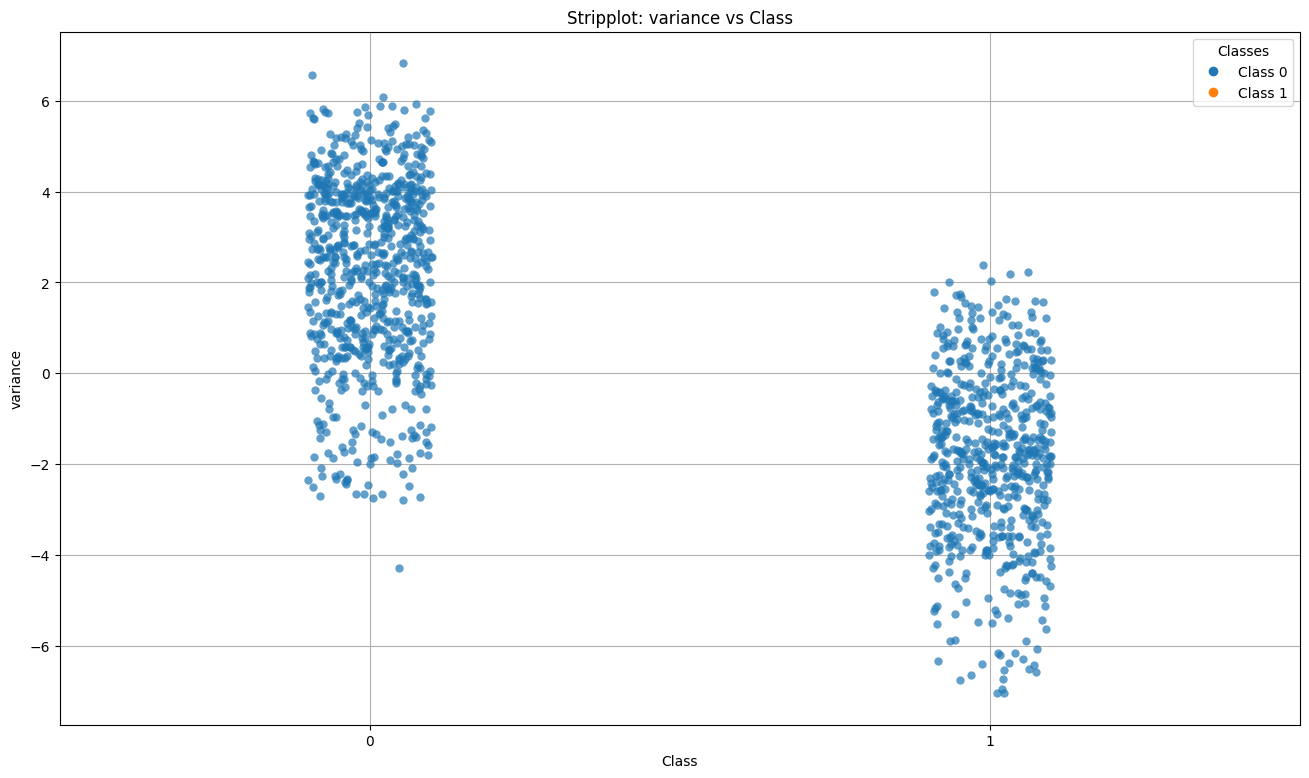

In [9]:
variances = data[["skewness", "curtosis", "variance"]].var()
feat_min_var = variances.idxmin()

plt.figure(figsize=(16, 9))

ax = sns.stripplot(data=data, x="class", y=feat_min_var, jitter=True, alpha=0.7, size=6)

plt.xlabel("Class")
plt.ylabel(feat_min_var)
plt.title(f"Stripplot: {feat_min_var} vs Class")

handles = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label=f"Class {cls}",
        markerfacecolor="C" + str(i),
        markersize=8,
    )
    for i, cls in enumerate(sorted(data["class"].unique()))
]
plt.legend(handles=handles, title="Classes")

plt.grid(True)
plt.show()

### 6
___

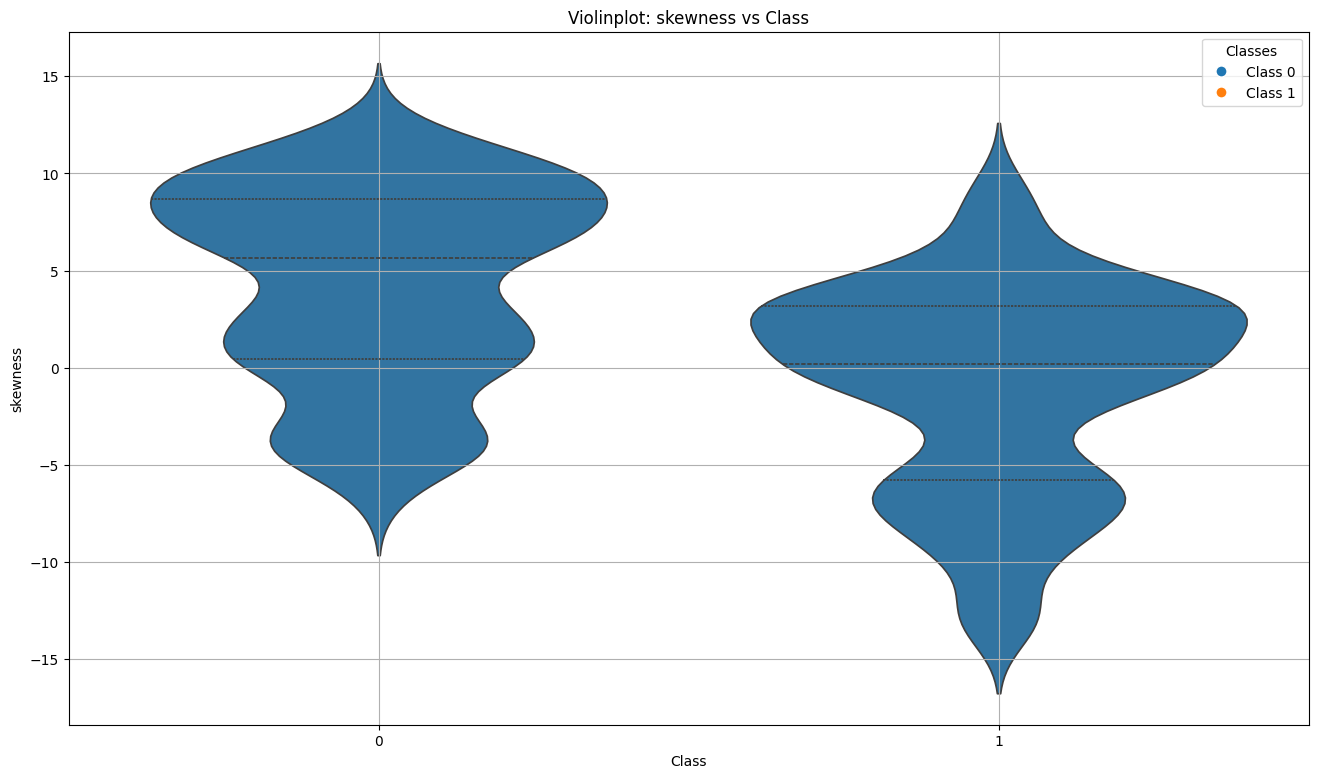

In [10]:
features = data[["skewness", "curtosis", "variance"]]
variances = features.var()
feat_max_var = variances.idxmax()

plt.figure(figsize=(16, 9))

ax = sns.violinplot(data=data, x="class", y=feat_max_var, inner="quartile")

ax.set_xlabel("Class")
ax.set_ylabel(feat_max_var)
ax.set_title(f"Violinplot: {feat_max_var} vs Class")
ax.grid(True)

classes = sorted(data["class"].unique())
handles = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor=f"C{i}",
        markersize=8,
        label=f"Class {cls}",
    )
    for i, cls in enumerate(classes)
]
plt.legend(handles=handles, title="Classes")

plt.show()

In [11]:
z = features.apply(zscore)
outlier_mask = np.abs(z) > 3
outlier_features = [col for col in features.columns if outlier_mask[col].any()]
outlier_features

['curtosis']

### 7
___

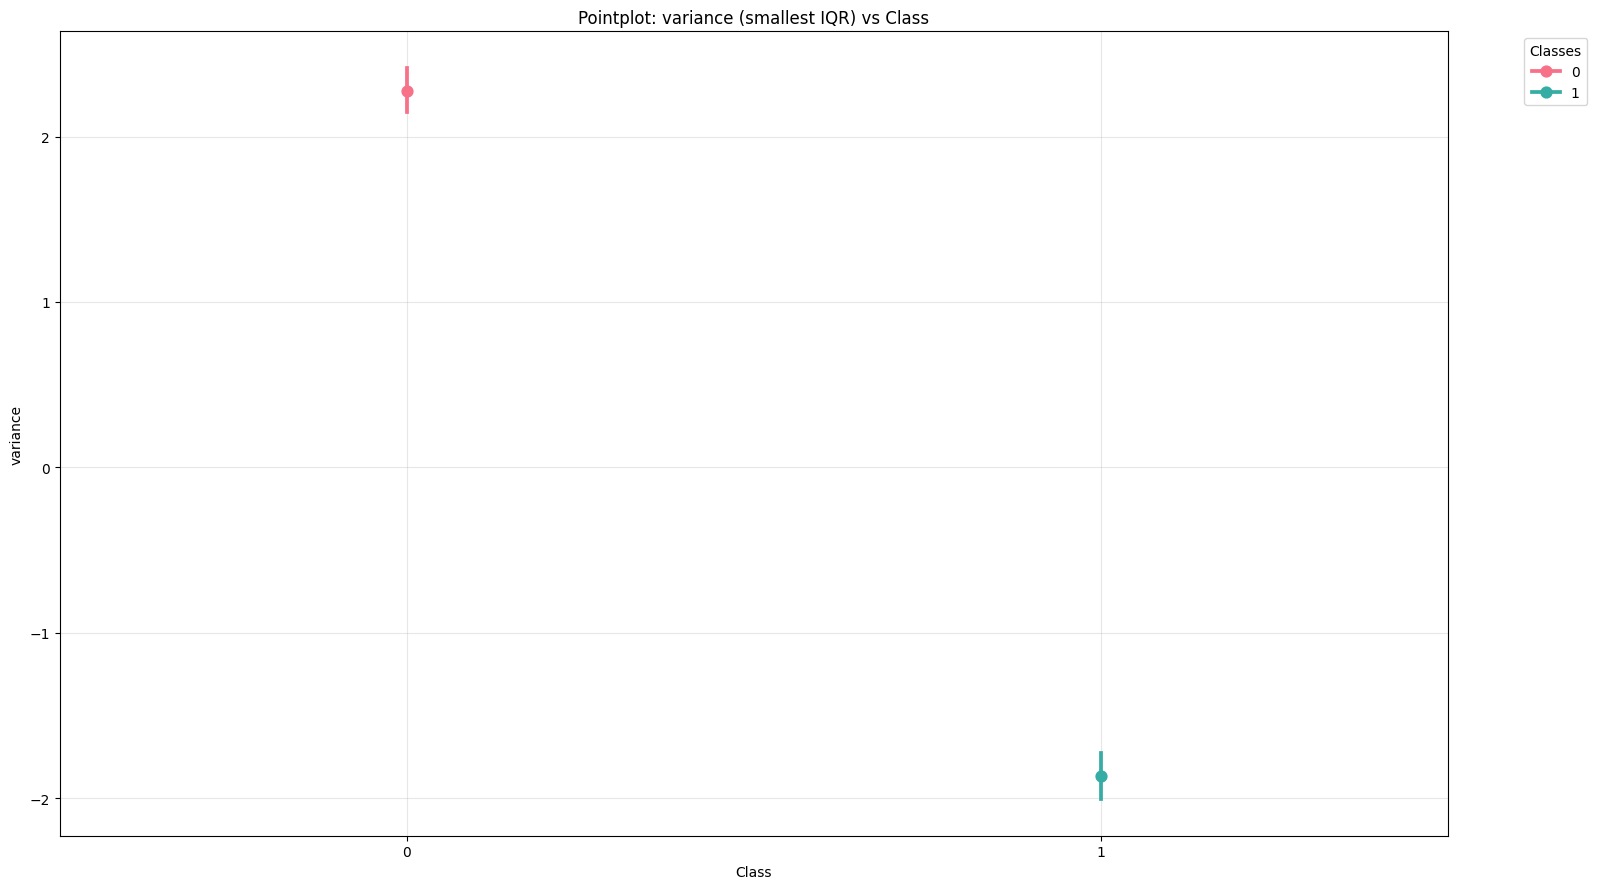

In [18]:
features = data[["skewness", "curtosis", "variance"]]

iqr_values = features.quantile(0.75) - features.quantile(0.25)

feat_iqr_min = iqr_values.idxmin()

plt.figure(figsize=(16, 9))

ax = sns.pointplot(
    data=data, x="class", y=feat_iqr_min, hue="class", dodge=False, palette="husl"
)

plt.xlabel("Class")
plt.ylabel(feat_iqr_min)
plt.title(f"Pointplot: {feat_iqr_min} (smallest IQR) vs Class")
plt.legend(title="Classes", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 8
___

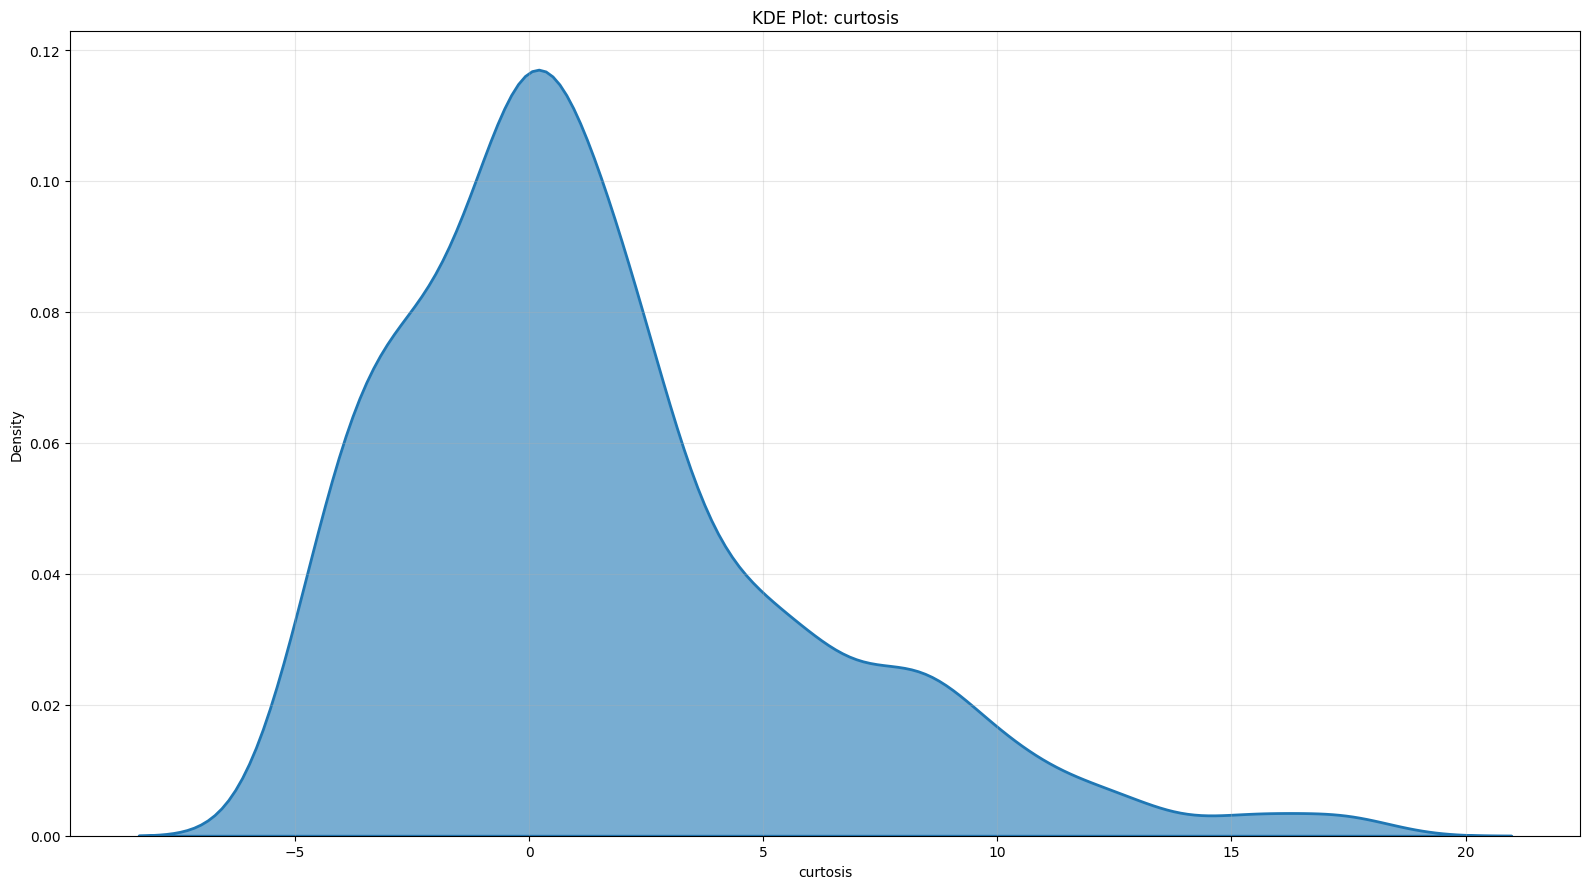

In [13]:
second_feat = "curtosis"

plt.figure(figsize=(16, 9))

sns.kdeplot(data=data, x=second_feat, fill=True, alpha=0.6, linewidth=2)

plt.xlabel(second_feat)
plt.ylabel("Density")
plt.title(f"KDE Plot: {second_feat}")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 9
___

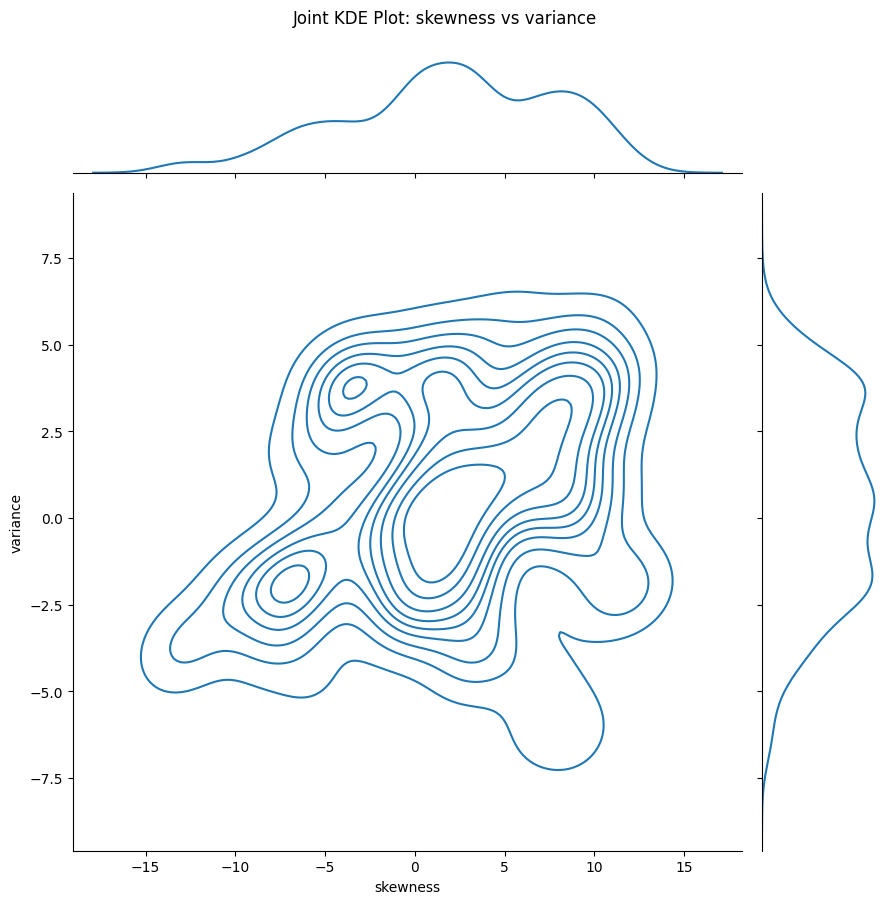

In [14]:
first_feat = "skewness"
third_feat = "variance"

g = sns.jointplot(
    data=data, x=first_feat, y=third_feat, kind="kde", height=9, space=0.2
)

g.fig.suptitle(f"Joint KDE Plot: {first_feat} vs {third_feat}", y=1.00)
g.set_axis_labels(first_feat, third_feat)

plt.tight_layout()
plt.show()

### 10
___

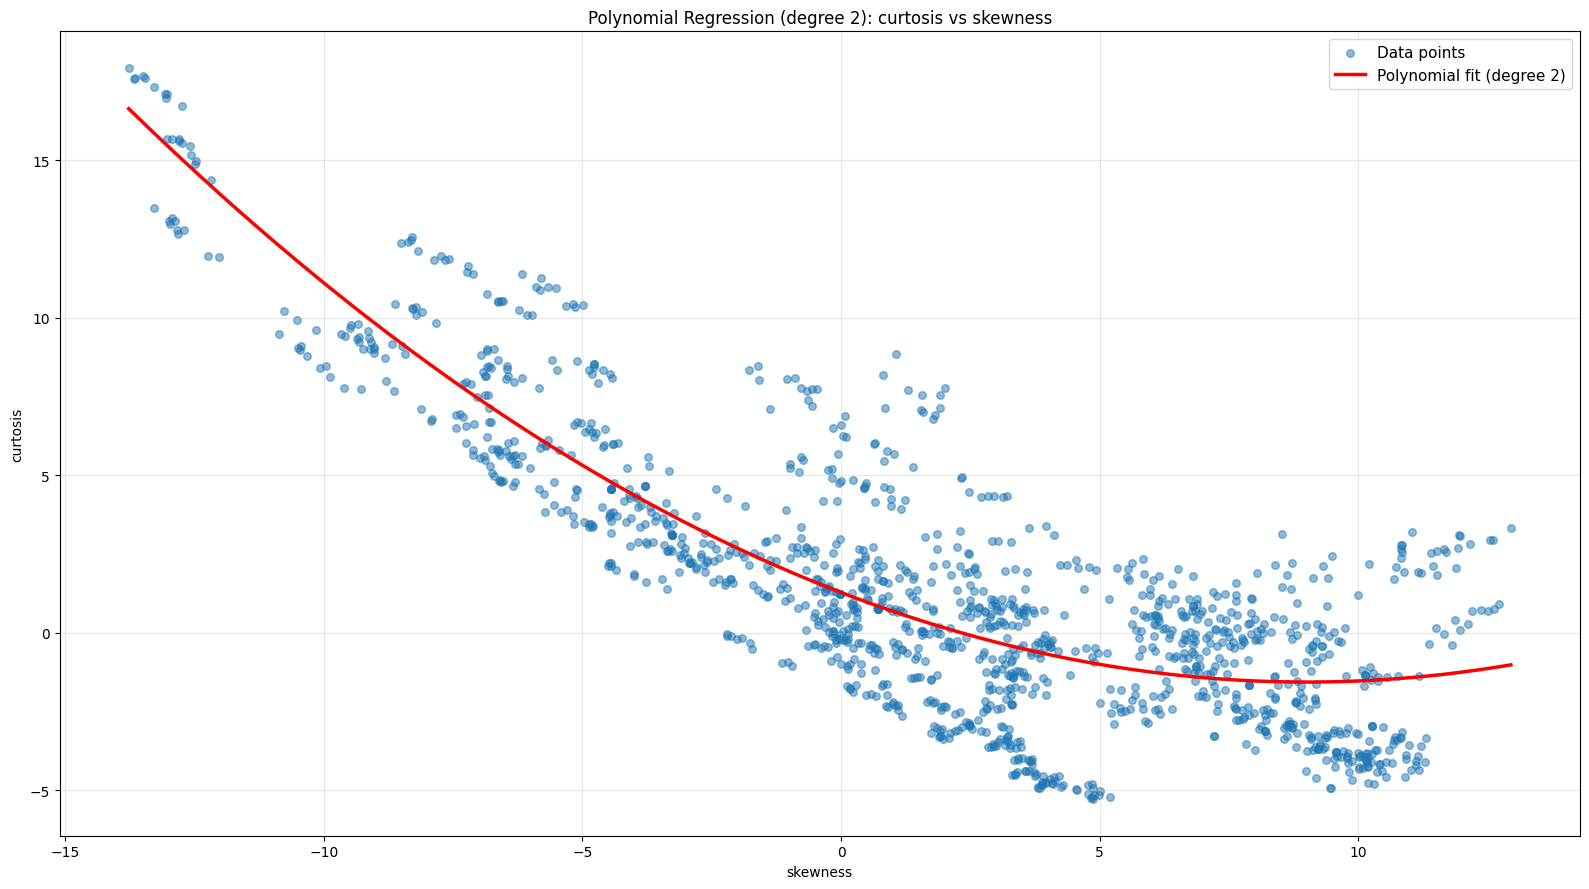

In [15]:
first_feat = "skewness"
second_feat = "curtosis"

data_sorted = data.sort_values(by=first_feat)

coeffs = np.polyfit(data[first_feat], data[second_feat], 2)
poly = np.poly1d(coeffs)

x_smooth = np.linspace(data[first_feat].min(), data[first_feat].max(), 300)
y_smooth = poly(x_smooth)

plt.figure(figsize=(16, 9))

plt.scatter(data[first_feat], data[second_feat], alpha=0.5, s=30, label="Data points")

plt.plot(x_smooth, y_smooth, "r-", linewidth=2.5, label=f"Polynomial fit (degree 2)")

plt.xlabel(first_feat)
plt.ylabel(second_feat)
plt.title(f"Polynomial Regression (degree 2): {second_feat} vs {first_feat}")
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()